### Lena 사진에서 히스토그램 추출하기
#### 히스토그램이란 영상의 명암값이 나타난 빈도수로, [0,L-1] 사이의 명암값 각각이 영상에 몇 번 나타나는지를 표시한다.
#### Opencv를 이용해 이미지를 불러오는 경우 0~255로 명암값을 나타낸다. 즉 [0,255] 사이의 명암값 각각이 영상에 몇 번 나타나는지를 표시한다.
#### 히스토그램의 여러 용도 중 하나는 영상의 특성을 파악하는 것이다. 히스토그램이 왼쪽으로 치우처져 있으면 어두운 영상, 오른쪽으로 치우처져 있으면 밝은 영상이다.


#### Opencv에서는 bgr 순서이기 때문에 cv2의 imshow가 아닐때는 rgb 순서로 바꿔줘야한다.

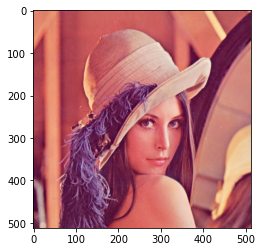

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread('./data/lena.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

#### 각 채널의 명암값을 count 한다.

In [2]:
r_hist = np.zeros((256))
b_hist = np.zeros((256))
g_hist = np.zeros((256))

im_flat = np.reshape(img.copy(),(-1,3))
leng = len(im_flat)
for i in range(leng):
    b_hist[im_flat[i][0]]+=1
    g_hist[im_flat[i][1]]+=1
    r_hist[im_flat[i][2]]+=1

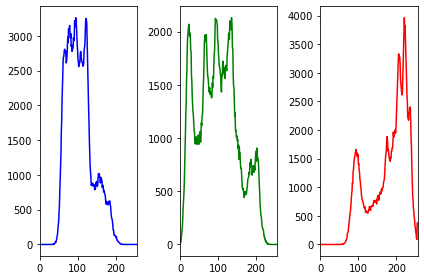

In [3]:
fig = plt.figure()
plt.subplot(131)
plt.plot(b_hist,color='b')
plt.xlim([0,256])

plt.subplot(132)
plt.plot(g_hist,color='g')
plt.xlim([0,256])

plt.subplot(133)
plt.plot(r_hist,color='r')
plt.xlim([0,256])
fig.tight_layout() # 그래프가 겹치는 것을 방지 할 수 있음
plt.show()

#### opencv에서는 calcHist를 사용하면 좀 더 빠르게 할 수 있다.
#### cv2.calcHist(images, channels, mask, histSize, ranges)
- images : 이미지
- channels : 이미지에서 계산하고자 하는 히스토그램의 채널
- mask : 계산할 영역을 지정할 수 있다. 아무값도 지정하지 않으면 전체를 범위로 한다.
- histSize : 히스토그램의 칸(bin) 수 
- ranges : 히스토그램을 계산할 범위

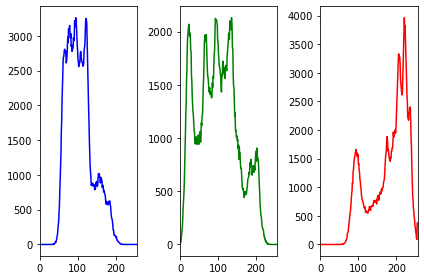

In [4]:
## using cv
fig = plt.figure()
color = ['b','g','r']
for i in range(3):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.subplot(131+i)
    plt.plot(hist,color=color[i])
    plt.xlim([0,256])
fig.tight_layout()
plt.show()